# 1: This is a simple implement K-meancluster algorithm(Not using any scikit-learn

In [4]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import random
np.random.seed(18)

means = [[2, 2],[8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2), axis = 0)
K = 3 # 3 clusters
origin_label = np.asarray([0]*N + [1]*N + [2]*N).T


In [5]:
def kmeans_init_centroids(X, k):
    return X[np.random.choice(X.shape[0], k, replace=False)]

def kmeans_assign_label(X, centroids):
    D = cdist(X, centroids)
    return np.argmin(D, axis=1) # return the index of the closest centroids

def kmeans_update_centroids(X, labels, K):
    centroids = np.zeros((K, X.shape[1]))
    for k in range(K):
        #Collect all points that has assgined to the k-th cluster
        Xk = X[labels == k, :]
        centroids[k,:] = np.mean(Xk, axis=0) #take the average
    return centroids;

def has_converged(centroids, new_centroids):
    return set([tuple(a) for a in centroids]) == set([tuple(a) for a in new_centroids])


In [ ]:
# phần chính của k-mean cluster

In [6]:
def kmeans(X, K):
    centroids = [kmeans_init_centroids(X, K)]
    labels = []
    it = 0
    while True:
        labels.append(kmeans_assign_label(X, centroids[-1]))
        new_centroids = kmeans_update_centroids(X, labels[-1], K)
        if has_converged(centroids[-1], new_centroids):
            break
        centroids.append(new_centroids)
        it += 1
    return (centroids, labels, it)

In [7]:
(centroids, labels, it) = kmeans(X, K)
print('Centers found by our algprithm:\n', centroids[-1])

Centers found by our algprithm:
 [[3.02702878 5.95686115]
 [8.07476866 3.01494931]
 [1.9834967  1.96588127]]


# Sử dụng thư viện scikit-learn để hiện thực ví dụ

In [8]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, random_state=0).fit(X)
print('Centers found by Scikit-learn:')
print(model.cluster_centers_)
pred_label = model.predict(X)

Centers found by Scikit-learn:
[[8.07476866 3.01494931]
 [3.02702878 5.95686115]
 [1.9834967  1.96588127]]


# Sử dụng K-mean cho bài toán phân loại chữ viết tay

In [9]:
import mnist
from mnist import 

SyntaxError: invalid syntax (<ipython-input-9-e7b18adc34a7>, line 2)

# Phân cụm vùng màu trên ảnh màu với k-mean

In [11]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [12]:
img = mpimg.imread('girl3.jpg')

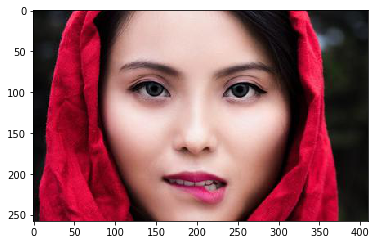

In [13]:
plt.imshow(img)

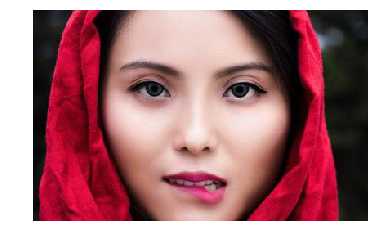

In [14]:
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

In [15]:
X = img.reshape((img.shape[0]*img.shape[1], img.shape[2]))

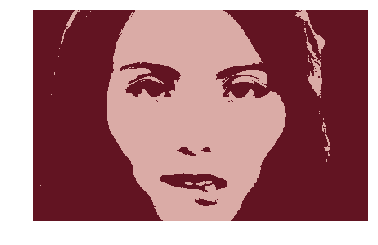

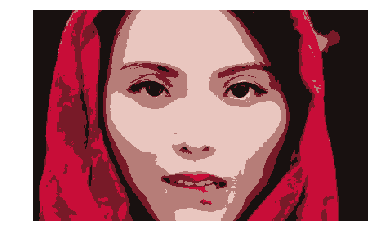

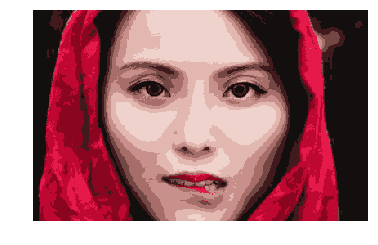

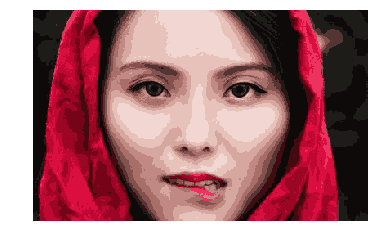

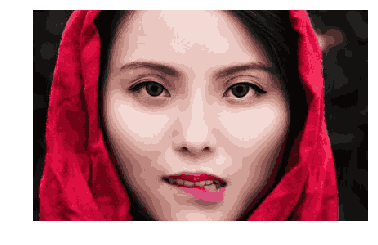

In [16]:
for K in [2, 5, 10, 15, 20]:
    kmeans = KMeans(n_clusters=K).fit(X)
    labels = kmeans.predict(X)
    
    img4 = np.zeros_like(X)
    #replace its pixel by its center
    for k in range(K):
        img4[labels == k] = kmeans.cluster_centers_[k]
    #reshape and display output
    img5 = img4.reshape((img.shape[0], img.shape[1], img.shape[2]))
    plt.imshow(img5, interpolation='nearest')
    plt.axis('off')
    plt.show()

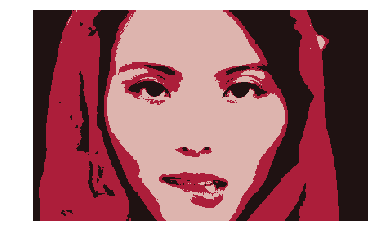

In [50]:
for K in [3]:
    kmeans = KMeans(n_clusters=K).fit(X)
    labels = kmeans.predict(X)
    
    img4 = np.zeros_like(X)
    #replace its pixel by its center
    for k in range(K):
        img4[labels == k] = kmeans.cluster_centers_[k]
    #reshape and display output
    img5 = img4.reshape((img.shape[0], img.shape[1], img.shape[2]))
    plt.imshow(img5, interpolation='nearest')
    plt.axis('off')
    plt.show()

In [1]:
import sklearn